## **Dow Jones Industrial Average**

In [2]:
import pandas as pd
import datetime
from pandas import Series, DataFrame
import yfinance
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define the time frame of the project and data
start_date = '2015-01-01'
end_date = '2021-11-28'

In [4]:
import requests

In [5]:
#Dow Jones tickers
table_DJIwgt = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average',match='American Express')
df_DJIwgt = table_DJIwgt[0]
# df_DJIwgt['index weighting'].astype('int32')
DowJones_symbols = list(df_DJIwgt['Symbol'])
DowJones_symbols= sorted(DowJones_symbols)
print(DowJones_symbols)

['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT']


In [6]:
prices = yfinance.download(list(DowJones_symbols), start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  30 of 30 completed


In [7]:
prices.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,24.983652,131.703934,83.574059,113.683449,74.390007,59.310001,22.326750,82.215622,87.786346,NaN,...,43.953144,40.920746,44.625633,74.061699,90.356812,90.660690,62.545105,34.169228,63.015099,73.667007
2015-01-02,24.745998,132.200027,83.556068,113.657211,74.674469,59.240002,22.310593,82.508781,87.376259,NaN,...,44.262737,41.193821,44.105816,73.533218,90.006828,90.382690,63.217808,34.300697,62.849724,73.684143
2015-01-05,24.048866,130.629105,81.346375,112.870049,70.732666,58.169998,21.866158,79.210770,86.099403,NaN,...,44.920601,40.815006,43.395718,73.183594,88.922707,88.893959,61.822330,34.015842,61.609261,73.469719
2015-01-06,24.051128,126.420593,79.612717,111.540642,70.277534,57.200001,21.858074,79.174133,85.642715,NaN,...,46.685226,40.215969,43.140434,72.850235,88.128830,88.714584,61.423981,34.359135,61.766396,74.035843
2015-01-07,24.388367,130.835770,81.351440,113.272362,71.366600,56.930000,22.060091,79.108177,86.518822,NaN,...,47.683632,40.726929,44.031574,73.232353,89.631203,89.620399,62.246948,34.137417,63.345905,76.000183


In [8]:
prices.corr()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
AAPL,1.000000,0.888801,0.855200,0.153543,0.885626,0.949707,0.755880,0.288323,0.884922,0.716913,...,0.782154,0.977966,0.970814,0.925843,0.731353,0.931728,0.906880,0.784561,-0.752249,0.933054
AMGN,0.888801,1.000000,0.789020,0.352587,0.844241,0.907807,0.804120,0.377798,0.791448,0.420587,...,0.880151,0.906622,0.866799,0.910150,0.686483,0.911748,0.947289,0.901253,-0.816812,0.937838
AXP,0.855200,0.789020,1.000000,0.515829,0.914378,0.881953,0.907430,0.649237,0.901051,0.852481,...,0.815728,0.897628,0.892634,0.836086,0.905625,0.920413,0.897960,0.774054,-0.633471,0.860140
BA,0.153543,0.352587,0.515829,1.000000,0.476960,0.363007,0.677562,0.835863,0.303742,0.040147,...,0.488648,0.258993,0.252660,0.248761,0.620272,0.434325,0.464557,0.492483,-0.296365,0.351049
CAT,0.885626,0.844241,0.914378,0.476960,1.000000,0.887524,0.856965,0.602251,0.864525,0.941112,...,0.740032,0.892520,0.883833,0.814268,0.888780,0.946230,0.890792,0.775966,-0.652885,0.878893
CRM,0.949707,0.907807,0.881953,0.363007,0.887524,1.000000,0.864008,0.420552,0.844927,0.673285,...,0.873606,0.971791,0.960316,0.930006,0.779073,0.961001,0.957078,0.874028,-0.822098,0.952779
CSCO,0.755880,0.804120,0.907430,0.677562,0.856965,0.864008,1.000000,0.724923,0.784391,0.651902,...,0.876513,0.844301,0.814235,0.801338,0.881022,0.900431,0.914751,0.864392,-0.723498,0.849295
CVX,0.288323,0.377798,0.649237,0.835863,0.602251,0.420552,0.724923,1.000000,0.442058,0.430415,...,0.521581,0.390036,0.355839,0.348816,0.754954,0.542466,0.502686,0.499867,-0.260450,0.408612
DIS,0.884922,0.791448,0.901051,0.303742,0.864525,0.844927,0.784391,0.442058,1.000000,0.913386,...,0.764385,0.880075,0.909526,0.855808,0.835787,0.848884,0.862228,0.758345,-0.599980,0.840945
DOW,0.716913,0.420587,0.852481,0.040147,0.941112,0.673285,0.651902,0.430415,0.913386,1.000000,...,0.252955,0.694970,0.800722,0.654908,0.834618,0.779864,0.777612,0.482319,0.436922,0.610867


In [9]:
#Calculate Daily Returns
daily_returns = (prices/prices.shift(1)-1)
daily_returns

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,-0.009512,0.003767,-0.000215,-0.000231,0.003824,-0.001180,-0.000724,0.003566,-0.004671,NaN,...,0.007044,0.006673,-0.011648,-0.007136,-0.003873,-0.003066,0.010755,0.003848,-0.002624,0.000233
2015-01-05,-0.028172,-0.011883,-0.026446,-0.006926,-0.052786,-0.018062,-0.019920,-0.039972,-0.014613,NaN,...,0.014863,-0.009196,-0.016100,-0.004755,-0.012045,-0.016471,-0.022074,-0.008305,-0.019737,-0.002910
2015-01-06,0.000094,-0.032217,-0.021312,-0.011778,-0.006435,-0.016675,-0.000370,-0.000463,-0.005304,NaN,...,0.039283,-0.014677,-0.005883,-0.004555,-0.008928,-0.002018,-0.006443,0.010092,0.002551,0.007706
2015-01-07,0.014022,0.034925,0.021840,0.015525,0.015497,-0.004720,0.009242,-0.000833,0.010230,NaN,...,0.021386,0.012705,0.020657,0.005245,0.017047,0.010210,0.013398,-0.006453,0.025572,0.026532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-19,0.016976,0.010097,-0.015152,-0.057734,-0.004865,-0.006007,-0.007086,-0.022193,-0.010156,-0.011038,...,-0.028296,0.005392,0.020601,-0.002039,-0.022432,-0.021069,-0.012148,-0.007416,-0.017566,-0.005379
2021-11-22,0.002927,-0.016256,-0.015213,-0.019754,0.009679,-0.014377,0.025352,0.017872,0.001039,0.025288,...,0.011648,-0.009560,-0.003660,0.006675,0.028453,-0.005591,-0.026287,0.013370,0.007237,0.016785
2021-11-23,0.002422,0.008879,-0.000292,-0.003668,0.014577,-0.018259,0.012821,0.020981,-0.020304,0.006634,...,0.014209,-0.006327,-0.011995,0.011096,0.021610,0.021918,0.014879,0.004074,0.001479,0.007114


In [10]:
#Calculate Standard Deviation
daily_returns.std()


AAPL    0.018269
AMGN    0.016155
AXP     0.019954
BA      0.026206
CAT     0.018869
CRM     0.020816
CSCO    0.016281
CVX     0.019657
DIS     0.016864
DOW     0.028403
GS      0.018769
HD      0.015220
HON     0.014891
IBM     0.015679
INTC    0.020124
JNJ     0.011797
JPM     0.017912
KO      0.011720
MCD     0.013648
MMM     0.014426
MRK     0.014012
MSFT    0.016976
NKE     0.017313
PG      0.011869
TRV     0.015545
UNH     0.016973
V       0.015942
VZ      0.011309
WBA     0.018684
WMT     0.013440
dtype: float64

In [11]:
# Risk defined as standard deviation of the returns
def get_risk(prices):
    return (prices / prices.shift(1) - 1).dropna().std().values

In [12]:
# Risk defined as standard deviation of the returns
def get_return(prices):
    return ((prices / prices.shift(1) - 1).dropna().mean()*np.sqrt(250)).values

In [13]:
prices = prices.dropna()
risk_v = get_risk(prices)
return_v = get_return(prices)

In [14]:
risk_v

array([0.02161577, 0.01785948, 0.02727922, 0.03715505, 0.02136486,
       0.0238334 , 0.01953595, 0.02595594, 0.02247605, 0.02840308,
       0.02328935, 0.01927086, 0.019674  , 0.01907246, 0.02524909,
       0.01396368, 0.02326914, 0.01516815, 0.01716245, 0.01816166,
       0.01624513, 0.01949825, 0.02035986, 0.01459095, 0.02096174,
       0.02145631, 0.01951491, 0.01187613, 0.02318438, 0.01430634])

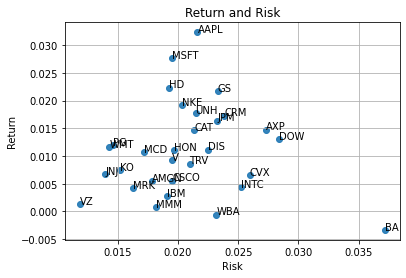

In [15]:
# Plotting return vs risk
fig, ax = plt.subplots()
ax.scatter(x=risk_v, y=return_v, alpha=0.9)
ax.set(title='Return and Risk', xlabel='Risk', ylabel='Return')
for i, symbol in enumerate(DowJones_symbols):
    ax.annotate(symbol, (risk_v[i], return_v[i]))
ax.grid()
plt.show()

# **Define Simulation**:




# New Section

In [16]:
# Generate the random weights
def random_weights(n):
    weights = np.random.rand(n)
    return weights / sum(weights)

In [17]:
# Generate the risks
def get_portfolio_risk(weights, normalized_prices):
    portfolio_val = (normalized_prices * weights).sum(axis=1)
    portfolio = pd.DataFrame(index=normalized_prices.index, data={'portfolio': portfolio_val})
    return (portfolio / portfolio.shift(1) - 1).dropna().std().values[0]

In [18]:
# Generate the returns
def get_portfolio_return(weights, normalized_prices):
    portfolio_val = (normalized_prices * weights).sum(axis=1)
    portfolio = pd.DataFrame(index=normalized_prices.index, data={'portfolio': portfolio_val})
    ret = get_return(portfolio)
    return ret[0]

In [19]:
np.random.seed(0)
# Normalized the price based on first portfolio prices
normalized_prices = prices / prices.iloc[0, :]       # Note:  .ix replaced by iloc

In [20]:
normalized_prices

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-20,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-03-21,1.036830,1.004029,1.009479,0.990802,1.007894,1.021038,1.012767,1.009383,0.987908,0.983534,...,1.010599,1.022975,1.015226,1.007570,1.023148,1.006068,1.013333,1.010751,1.012900,1.004258
2019-03-22,1.015359,0.976873,0.988174,0.962808,0.975641,0.987707,0.990236,0.987168,0.983999,0.975903,...,1.002558,0.996001,0.948091,0.999410,1.027184,0.986387,0.995577,1.036241,0.993948,0.996351
2019-03-25,1.003083,0.976298,0.984382,0.984847,0.987745,0.983915,0.990049,0.985564,0.979998,0.986948,...,1.003289,1.001191,0.949706,1.002359,1.027564,0.985469,0.995317,1.041790,0.982481,0.995235
2019-03-26,0.992719,0.985088,0.988535,0.984634,0.991204,0.974864,0.999437,0.995509,1.001364,0.980924,...,1.010234,1.003319,0.961818,1.012780,1.027793,0.971617,1.010081,1.051327,0.986144,0.996756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-19,3.500779,1.168068,1.630213,0.582905,1.619283,1.841906,1.086162,1.028282,1.417239,1.321282,...,1.113522,3.006402,2.064540,1.546632,1.234045,1.828152,1.328689,0.992576,0.831585,1.506956
2021-11-22,3.511027,1.149080,1.605413,0.571390,1.634955,1.815424,1.113699,1.046659,1.418711,1.354694,...,1.126492,2.977662,2.056984,1.556956,1.269158,1.817931,1.293762,1.005847,0.837603,1.532250
2021-11-23,3.519531,1.159282,1.604943,0.569294,1.658787,1.782276,1.127977,1.068619,1.389906,1.363681,...,1.142498,2.958823,2.032311,1.574232,1.296585,1.857777,1.313012,1.009945,0.838842,1.543151


Monte Carlo Simulation to locate the optimal weight that gives the best risk adjusted return

In [21]:
# Initial the arrays
risk_all = np.array([])
return_all = np.array([])
optimized_weight = np.array([])
best_risk_return = 0
best_ret = 0
best_risk = 0

for _ in range(0, 5000):
    
    # Assign random weights to the stocks
    weights = random_weights(len(DowJones_symbols))
    
    # Portfolio value is the weight * price of each stock in portfolio
    portfolio_val = (normalized_prices * weights).sum(axis=1)
    
    # Convert to a data frame 
    portfolio = pd.DataFrame(index=prices.index, data={'portfolio': portfolio_val})
    
    # Get risk and return for the simulated portfolio
    risk = get_risk(portfolio)
    ret = get_return(portfolio)
    if ret/risk > best_risk_return:
      optimized_weight = weights
      best_risk_return = ret/risk
      best_risk = risk
      best_ret = ret

    
    # Add them to the 
    risk_all = np.append(risk_all, risk)
    return_all = np.append(return_all, ret)
    #p = get_portfolio_risk(weights=weights, normalized_prices=normalized_prices)

In [22]:
risk_all

array([0.01417974, 0.01496881, 0.01487302, ..., 0.01516193, 0.01465518,
       0.01480551])

In [23]:
return_all

array([0.01068502, 0.01015773, 0.01093339, ..., 0.01081663, 0.01036237,
       0.01095206])

In [24]:
optimized_weight

array([0.06776937, 0.06350652, 0.00241561, 0.04344438, 0.04655831,
       0.07349337, 0.00177598, 0.04059236, 0.01565148, 0.00410147,
       0.04490186, 0.05905028, 0.05922312, 0.00231495, 0.03110299,
       0.00340188, 0.01894236, 0.01474191, 0.01644645, 0.02591889,
       0.02120311, 0.07354724, 0.02693454, 0.06834178, 0.01383705,
       0.05837332, 0.00468865, 0.03536893, 0.00042116, 0.06193068])

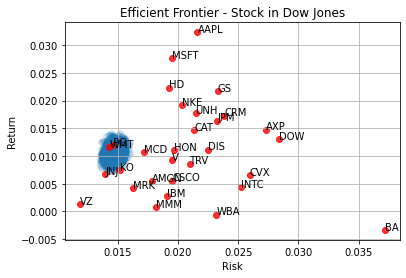

In [25]:
# Plot the simulated portfolio

# Define the plot
fig, ax = plt.subplots()

# Define x and y axis and titales
ax.scatter(x=risk_all, y=return_all, alpha=0.15)
ax.set(title='Return and Risk - Stock in Dow Jones', xlabel='Risk', ylabel='Return')

# Plot the 'original' portfoil
for i, symbol in enumerate(DowJones_symbols):
    ax.annotate(symbol, (risk_v[i], return_v[i]))
    
ax.scatter(x=risk_v, y=return_v, alpha=0.8, color='red')
ax.set(title='Efficient Frontier - Stock in Dow Jones', xlabel='Risk', ylabel='Return')

# Display the scattered graph
ax.grid()
plt.show()

In [26]:
normalized_prices_add = normalized_prices

In [27]:
portoflio_value = []
normalized_prices_add = normalized_prices
normalized_prices_add['portfolio_value'] = ''
i=0
for date in normalized_prices_add.index:
  price = sum(x*y for x,y in zip(optimized_weight, list(normalized_prices.iloc[i])))
  portoflio_value.append(price)
  normalized_prices_add.iloc[i,30] = price
  i=i+1
normalized_prices_add.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,portfolio_value
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-20,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-03-21,1.036830,1.004029,1.009479,0.990802,1.007894,1.021038,1.012767,1.009383,0.987908,0.983534,...,1.022975,1.015226,1.007570,1.023148,1.006068,1.013333,1.010751,1.012900,1.004258,1.011277
2019-03-22,1.015359,0.976873,0.988174,0.962808,0.975641,0.987707,0.990236,0.987168,0.983999,0.975903,...,0.996001,0.948091,0.999410,1.027184,0.986387,0.995577,1.036241,0.993948,0.996351,0.992008
2019-03-25,1.003083,0.976298,0.984382,0.984847,0.987745,0.983915,0.990049,0.985564,0.979998,0.986948,...,1.001191,0.949706,1.002359,1.027564,0.985469,0.995317,1.041790,0.982481,0.995235,0.992550
2019-03-26,0.992719,0.985088,0.988535,0.984634,0.991204,0.974864,0.999437,0.995509,1.001364,0.980924,...,1.003319,0.961818,1.012780,1.027793,0.971617,1.010081,1.051327,0.986144,0.996756,0.996137


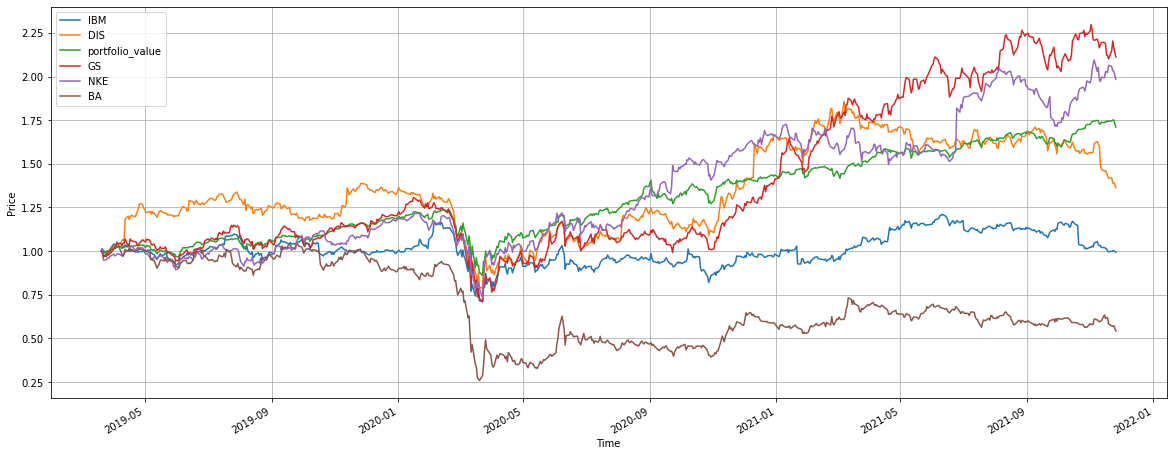

In [28]:
normalized_prices_add[['IBM','DIS','portfolio_value','GS','NKE','BA']].plot(figsize = (20, 8))
plt.grid()
plt.ylabel("Price")
plt.xlabel("Time")
plt.show()


In [29]:
risk_v

array([0.02161577, 0.01785948, 0.02727922, 0.03715505, 0.02136486,
       0.0238334 , 0.01953595, 0.02595594, 0.02247605, 0.02840308,
       0.02328935, 0.01927086, 0.019674  , 0.01907246, 0.02524909,
       0.01396368, 0.02326914, 0.01516815, 0.01716245, 0.01816166,
       0.01624513, 0.01949825, 0.02035986, 0.01459095, 0.02096174,
       0.02145631, 0.01951491, 0.01187613, 0.02318438, 0.01430634])

In [30]:
index_prices = yfinance.download("^DJI", start="2019-03-20", end=end_date)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [31]:
normalized_index_prices = index_prices / index_prices[0] 
normalized_prices_add['DJI'] = normalized_index_prices

In [32]:
normalized_prices_add.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,portfolio_value,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-20,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.994526
2019-03-21,1.036830,1.004029,1.009479,0.990802,1.007894,1.021038,1.012767,1.009383,0.987908,0.983534,...,1.015226,1.007570,1.023148,1.006068,1.013333,1.010751,1.012900,1.004258,1.011277,1.002902
2019-03-22,1.015359,0.976873,0.988174,0.962808,0.975641,0.987707,0.990236,0.987168,0.983999,0.975903,...,0.948091,0.999410,1.027184,0.986387,0.995577,1.036241,0.993948,0.996351,0.992008,0.985126
2019-03-25,1.003083,0.976298,0.984382,0.984847,0.987745,0.983915,0.990049,0.985564,0.979998,0.986948,...,0.949706,1.002359,1.027564,0.985469,0.995317,1.041790,0.982481,0.995235,0.992550,0.985686
2019-03-26,0.992719,0.985088,0.988535,0.984634,0.991204,0.974864,0.999437,0.995509,1.001364,0.980924,...,0.961818,1.012780,1.027793,0.971617,1.010081,1.051327,0.986144,0.996756,0.996137,0.991129


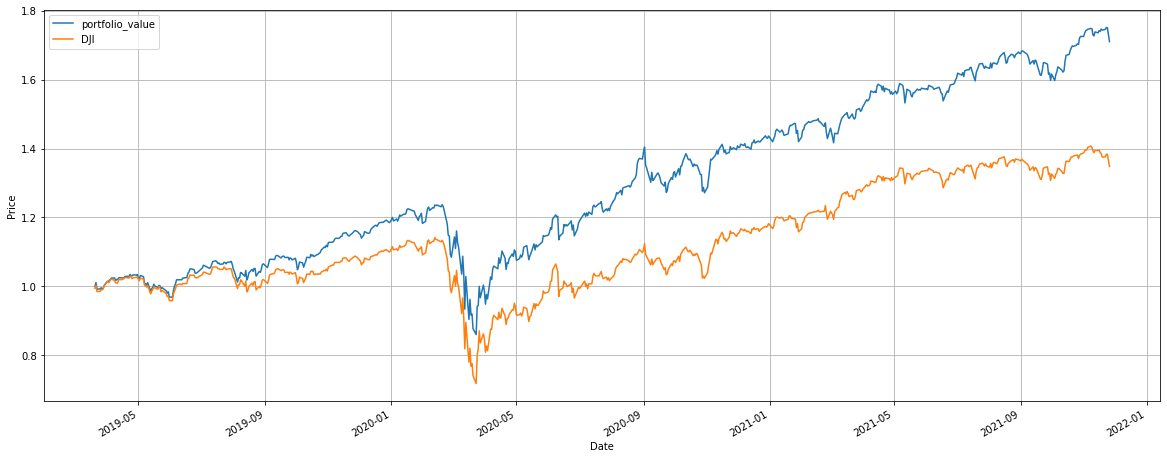

In [33]:
normalized_prices_add[['portfolio_value','DJI']].plot(figsize = (20, 8))
plt.grid()
plt.ylabel("Price")
plt.show()

In [34]:
# Sharpe Ratio Calculation
risk_v2 = get_risk(normalized_prices_add)
return_v2 = get_return(normalized_prices_add)
sharpe_ratio = return_v2/risk_v2

In [35]:
print("Sharpe Ratio of original DJI optimzed portfolio is {}".format(sharpe_ratio[-1].round(4)))
print("Sharpe Ratio of CAPM optimzed portfolio is {}".format(sharpe_ratio[-2].round(4)))

Sharpe Ratio of original DJI optimzed portfolio is 0.5843
Sharpe Ratio of CAPM optimzed portfolio is 0.9793
